In [1]:
using JLD2
using Images
using DifferentialEquations, ForwardDiff, OrdinaryDiffEq, Sundials
using Plots, LaTeXStrings
using LsqFit
#using CurveFit

# Input

In [2]:
F= jldopen("Results_out_V0.5Uin0.1.jld2","r");
#F= jldopen("Results_out_V0.5Uin0.5.jld2","r");
#F= jldopen("Results_out_V0.5Uin1.0.jld2","r");
#F= jldopen("Results_out_V0.5Uin2.0.jld2","r");
#F= jldopen("Results_out_V0.5Uin4.0.jld2","r");            


#F= jldopen("Results_out_V1.0Uin0.1.jld2","r");
#F= jldopen("Results_out_V1.0Uin0.5.jld2","r");
#F= jldopen("Results_out_V1.0Uin1.0.jld2","r");
#F= jldopen("Results_out_V1.0Uin2.0.jld2","r");
#F= jldopen("Results_out_V1.0Uin4.0.jld2","r");

#F= jldopen("Results_out_Ufi1.0Vfi0.5.jld2","r");
#F= jldopen("Results_out_Ufi1.0Vfi1.0.jld2","r");
#F= jldopen("Results_out_Ufi2.0Vfi0.5.jld2","r");
#F= jldopen("Results_out_Ufi2.0Vfi1.0.jld2","r");  



In [3]:
for i in 1:length(F)
    println(i,"\t\t",F["$i"]["Uin"],"\t",F["$i"]["Vin"],"\t",F["$i"]["UU"],"\t",F["$i"]["VV"])
end

1		0.1	0.5	0.1	0.5
2		0.1	0.5	0.2	0.5
3		0.1	0.5	0.3	0.5
4		0.1	0.5	0.4	0.5
5		0.1	0.5	0.5	0.5
6		0.1	0.5	0.6	0.5
7		0.1	0.5	0.7	0.5
8		0.1	0.5	0.8	0.5
9		0.1	0.5	0.9	0.5
10		0.1	0.5	1.0	0.5
11		0.1	0.5	1.1	0.5
12		0.1	0.5	1.2	0.5
13		0.1	0.5	1.3	0.5
14		0.1	0.5	1.41	0.5
15		0.1	0.5	1.42	0.5
16		0.1	0.5	1.43	0.5
17		0.1	0.5	1.44	0.5
18		0.1	0.5	1.45	0.5
19		0.1	0.5	1.46	0.5
20		0.1	0.5	1.47	0.5
21		0.1	0.5	1.48	0.5
22		0.1	0.5	1.49	0.5
23		0.1	0.5	1.4	0.5
24		0.1	0.5	1.51	0.5
25		0.1	0.5	1.52	0.5
26		0.1	0.5	1.53	0.5
27		0.1	0.5	1.54	0.5
28		0.1	0.5	1.55	0.5
29		0.1	0.5	1.56	0.5
30		0.1	0.5	1.57	0.5
31		0.1	0.5	1.58	0.5
32		0.1	0.5	1.59	0.5
33		0.1	0.5	1.5	0.5
34		0.1	0.5	1.61	0.5
35		0.1	0.5	1.62	0.5
36		0.1	0.5	1.63	0.5
37		0.1	0.5	1.64	0.5
38		0.1	0.5	1.65	0.5
39		0.1	0.5	1.66	0.5
40		0.1	0.5	1.67	0.5
41		0.1	0.5	1.68	0.5
42		0.1	0.5	1.69	0.5
43		0.1	0.5	1.6	0.5
44		0.1	0.5	1.71	0.5
45		0.1	0.5	1.72	0.5
46		0.1	0.5	1.73	0.5
47		0.1	0.5	1.74	0.5
48		0.1	0.5	1.75	0.5
49		0.1	0.5	1.76	

In [4]:
Lngth=length(F)-1

Ufdisord = Array{Float64}(undef,Lngth);
U = Array{Float64}(undef,Lngth);
ordering = Array{Int}(undef,Lngth);

for i in 1:Lngth
    Ufdisord[i]=F["$i"]["UU"]
end

U=sort(Ufdisord) 

for j in 1:Lngth
    for i in 1:length(F)
        if abs(U[i]-F["$j"]["UU"])<1e-8
            println(i," ",U[i],"  ->  ",j," ",F["$j"]["UU"])
            ordering[i]=j
            break
        end
    end
end
 


1 0.1  ->  1 0.1
2 0.2  ->  2 0.2
3 0.3  ->  3 0.3
4 0.4  ->  4 0.4
5 0.5  ->  5 0.5
6 0.6  ->  6 0.6
7 0.7  ->  7 0.7
8 0.8  ->  8 0.8
9 0.9  ->  9 0.9
10 1.0  ->  10 1.0
11 1.1  ->  11 1.1
12 1.2  ->  12 1.2
13 1.3  ->  13 1.3
15 1.41  ->  14 1.41
16 1.42  ->  15 1.42
17 1.43  ->  16 1.43
18 1.44  ->  17 1.44
19 1.45  ->  18 1.45
20 1.46  ->  19 1.46
21 1.47  ->  20 1.47
22 1.48  ->  21 1.48
23 1.49  ->  22 1.49
14 1.4  ->  23 1.4
25 1.51  ->  24 1.51
26 1.52  ->  25 1.52
27 1.53  ->  26 1.53
28 1.54  ->  27 1.54
29 1.55  ->  28 1.55
30 1.56  ->  29 1.56
31 1.57  ->  30 1.57
32 1.58  ->  31 1.58
33 1.59  ->  32 1.59
24 1.5  ->  33 1.5
35 1.61  ->  34 1.61
36 1.62  ->  35 1.62
37 1.63  ->  36 1.63
38 1.64  ->  37 1.64
39 1.65  ->  38 1.65
40 1.66  ->  39 1.66
41 1.67  ->  40 1.67
42 1.68  ->  41 1.68
43 1.69  ->  42 1.69
34 1.6  ->  43 1.6
45 1.71  ->  44 1.71
46 1.72  ->  45 1.72
47 1.73  ->  46 1.73
48 1.74  ->  47 1.74
49 1.75  ->  48 1.75
50 1.76  ->  49 1.76
51 1.77  ->  50 1.77


In [79]:
length(t)

2572

In [98]:
A  = Array{Float64}(undef,3,Lngth);
α  = Array{Float64}(undef,3,Lngth);    #   α =1/tᵣₑₗ

B₁ = Array{Float64}(undef,3,Lngth);
B₂ = Array{Float64}(undef,3,Lngth);
ω  = Array{Float64}(undef,3,Lngth);

D  = Array{Float64}(undef,3,Lngth);
β  = Array{Float64}(undef,3,Lngth);

pp = Array{Float64}(undef,Lngth,5);


#parameter=[0.0018274787274713176, 0.7070306236286084, 0.017470102905928604, -0.0002947957844343803, 0.0011523130095769938,0.0018274787274713176]
parameter=[0.0018274787274713176, 0.7070306236286084, 0.017470102905928604, -0.0002947957844343803, 0.0011523130095769938]
#[0.00072, 2*pi/8.0, 0.1, 0.1, 0.0]

   
tstart=50
tfinal=300

i_tstart=1
i_tfinal=length(t)

for j in 1:length(t)
    if t[j]>tstart
        i_tstart=j
        break
    end
end

for j in i_tstart:length(t)
    if t[j]>tfinal
        i_tfinal=j
        break
    end
end

println("tt($i_tstart)=$tstart    t($i_tfinal)=$tfinal")


for jj in 1:Lngth
        
    jjj=ordering[jj]
 
    Uin=F["$jjj"]["Uin"]
    Vin=F["$jjj"]["Vin"]
    Ufi=F["$jjj"]["UU"]
    U[jj]=Ufi
    Vfi=F["$jjj"]["VV"]
      
    if (abs(Ufi-Uin) + abs(Vfi-Vin) > 0.00001)   
        
        println("($Vin,$Uin) -> ($Vfi,$Ufi)")
                
        t=F["$jjj"]["t"]
        x1=real.(F["$jjj"]["solution_rho"][1,:] .- F["$jjj"]["solution_rho"][1,end])
 
      
        
                   


        #println(i_tstart,"  ",i_tfinal,"  ",length(x1))
        
        xdata=t[i_tstart:i_tfinal]
        ydata=x1[i_tstart:i_tfinal]
        
        #println(xdata[1],"  ",ydata[500])
        
    
        #m(t, p) = exp.(- t .* p[1]) .* (p[3] .* cos.(- t .* p[2]) .+ p[4] .* sin.(- t .* p[2])) .+ p[5] .*exp.(- t .* p[6])
        m(t, p) = exp.(- t .* p[1]) .* (p[3] .* cos.(- t .* p[2]) .+ p[4] .* sin.(- t .* p[2]) .+ p[5])
        
        p0=deepcopy(parameter)
        fit = curve_fit(m, xdata, ydata, p0);
        parameter=deepcopy(fit.param)
        
        for pindex in 1:5
            pp[jj,pindex]=parameter[pindex]
        end
        
          
        if (!fit.converged) 
            println("WARNING: FIT NOT CONVERGED")  
        end
               
        ci = confidence_interval(fit, 0.1)
        total_err = sum(map(x -> abs(x[2] - x[1]), ci))
        fmt_fl(x::Float64; left=3, right=5) = lpad(round(x, digits=5), 7,' ')
        cov = estimate_covar(fit)
                
        sum_cov=0
        for ij in 1:length(cov)
            sum_cov += cov[ij]
        end
                
        println(parameter)
        println(cov)
        println(sum_cov)
        println("")
        
                        
        α[1,jj] = parameter[1]
        α[2,jj] = ci[1][1] - α[1,jj]
        α[3,jj] = ci[1][2] - α[1,jj]
                      
        ω[1,jj] = parameter[2]
        ω[2,jj] = ci[2][1] - ω[1,jj] 
        ω[3,jj] = ci[2][2] - ω[1,jj]
        
        B₁[1,jj] = parameter[3]
        B₁[2,jj] = ci[3][1] - B₁[1,jj] 
        B₁[3,jj] = ci[3][2] - B₁[1,jj]
        
        B₂[1,jj] = parameter[4]
        B₂[2,jj] = ci[4][1] - B₂[1,jj] 
        B₂[3,jj] = ci[4][2] - B₂[1,jj]
         
        D[1,jj] = parameter[5]
        D[2,jj] = ci[5][1] - B₂[1,jj] 
        D[3,jj] = ci[5][2] - B₂[1,jj]

        
        
    end
    
end


tt(83)=50    t(759)=300
(0.5,0.1) -> (0.5,0.2)
[0.0018227161556771281, 0.7070675010858596, 0.017446776680840048, -0.00036370874764732303, 0.0012241136985743691]
[4.9733103843217693e-11 -3.0983011130982586e-13 1.412719827924664e-10 -2.2085911272153604e-12 9.051411591691518e-12; -3.0983011130982586e-13 4.889014626815462e-11 -3.672874894830404e-12 -1.3858552398563972e-10 3.4095625064889345e-13; 1.412719827924664e-10 -3.672874894830404e-12 4.776284854596643e-10 1.82991977079805e-12 2.5648289086389025e-11; -2.2085911272153604e-12 -1.3858552398563972e-10 1.82991977079805e-12 4.685111755494629e-10 -2.032878631853092e-12; 9.051411591691518e-12 3.4095625064889345e-13 2.5648289086389025e-11 -2.032878631853092e-12 3.9564292976450065e-11]
1.1469929255792408e-9

(0.5,0.1) -> (0.5,0.3)
[0.0037381131018979987, 0.7096840543108275, 0.03199938518578289, -0.0032336333801733967, 0.007616051003562463]
[2.507710401799213e-9 2.508355935984366e-11 1.173898283534588e-8 -1.3478431718424466e-9 2.7381055860638066

[0.11042154995387203, 0.8773933357164432, 0.030071923242913613, -0.0640693942057771, -0.004096833222953111]
[1.9501392214290127e-8 2.3144137452991103e-9 1.3935138682626974e-8 -4.472967433945744e-8 -4.307371398221962e-9; 2.3144137452991103e-9 1.812481696214025e-8 -3.6352467623472266e-8 -2.3848968053005082e-8 -5.310535980819998e-10; 1.3935138682626974e-8 -3.6352467623472266e-8 9.257792170547744e-8 7.68912426904895e-9 -3.1193956291440893e-9; -4.472967433945744e-8 -2.3848968053005082e-8 7.68912426904895e-9 1.238644387630369e-7 1.035782318427302e-8; -4.307371398221962e-9 -5.310535980819998e-10 -3.1193956291440893e-9 1.035782318427302e-8 1.9222273919935996e-9]
9.880593551666876e-8

(0.5,0.1) -> (0.5,1.42)
[0.1117607118883188, 0.8806495898182647, 0.029604470078847783, -0.06333055508422765, -0.004627010244214757]
[2.3622198719514762e-8 2.754726885707397e-9 1.6639385545472553e-8 -5.327137373885592e-8 -5.5839229169964465e-9; 2.754726885707397e-9 2.15495655724997e-8 -4.2464134958175825e-8 -2.7788

[0.12951543066190346, 0.9228522813212302, 0.02703794827979275, -0.060511165364501074, -0.018682525776729044]
[1.0202555443298904e-7 4.0774101934217245e-9 7.802806496718281e-8 -2.0238569130060348e-7 -6.712061821485541e-8; 4.0774101934217245e-9 7.639167599442958e-8 -1.387403967140698e-7 -7.368817820616536e-8 -1.3482263568075576e-9; 7.802806496718281e-8 -1.387403967140698e-7 3.2835664641604344e-7 -3.2414691349813636e-8 -5.4384369775052e-8; -2.0238569130060348e-7 -7.368817820616536e-8 -3.2414691349813636e-8 4.640192616980582e-7 1.33391156284975e-7; -6.712061821485541e-8 -1.3482263568075576e-9 -5.4384369775052e-8 1.33391156284975e-7 4.7033450457087426e-8]
3.0865550805503223e-7

(0.5,0.1) -> (0.5,1.55)
[0.1311637055088408, 0.9265060065911741, 0.027297972837646588, -0.0607384714577085, -0.020892246816486732]
[9.939233521169853e-8 2.7638626647329776e-9 7.903805443321918e-8 -1.9620062360862685e-7 -7.193354632351001e-8; 2.7638626647329776e-9 7.43678492175535e-8 -1.357683587775182e-7 -6.957295049

[0.1376701678945644, 0.9655394214076518, 0.027121158818393, -0.043653214807288426, -0.04543353346923782]
[5.6847999986874854e-8 -8.697826893027821e-9 5.981745577339072e-8 -7.11347889409597e-8 -7.988880290202335e-8; -8.697826893027821e-9 8.221812566440984e-8 -1.1154527584814841e-7 -5.4336185299133736e-8 1.3663987672656364e-8; 5.981745577339072e-8 -1.1154527584814841e-7 1.9521964672340193e-7 7.681320340467142e-9 -8.639018534606995e-8; -7.11347889409597e-8 -5.4336185299133736e-8 7.681320340467142e-9 1.451494842080647e-7 9.952570462238428e-8; -7.988880290202335e-8 1.3663987672656364e-8 -8.639018534606995e-8 9.952570462238428e-8 1.1393941517813378e-7]
1.307654781199562e-7

(0.5,0.1) -> (0.5,1.67)
[0.1366012606120901, 0.9691868597695574, 0.02591212325971306, -0.040339658043088776, -0.046109740057541954]
[7.994213726938826e-8 -1.3640340238546705e-8 8.172798474544773e-8 -9.114020816446039e-8 -1.1331897014979597e-7; -1.3640340238546705e-8 1.3117376512333438e-7 -1.6416911255276515e-7 -8.33665011

[0.11953582584318204, 1.0121779706098193, 0.01308434732130045, -0.015409098405142029, -0.04523631593248824]
[1.6516137386951562e-7 -5.850253683208455e-8 9.85376730914112e-8 -6.089721728984009e-8 -2.1911706016383634e-7; -5.850253683208455e-8 1.351884786167399e-6 -6.116493441452331e-7 -4.814784168589508e-7 8.458524791347765e-8; 9.85376730914112e-8 -6.116493441452331e-7 3.1767838893851663e-7 1.8133162446724093e-7 -1.353528954399909e-7; -6.089721728984009e-8 -4.814784168589508e-7 1.8133162446724093e-7 2.2391959674368328e-7 7.99398271739719e-8; -2.1911706016383634e-7 8.458524791347765e-8 -1.353528954399909e-7 7.99398271739719e-8 2.9603789921112455e-7]
1.0947584876257082e-7

(0.5,0.1) -> (0.5,1.79)
[0.11797054181325056, 1.0161467269278908, 0.01237481012420173, -0.014136747187741761, -0.04501776773480595]
[1.5895314584997928e-7 -5.8367608234144124e-8 9.02432554175869e-8 -5.289093685210488e-8 -2.0921293184923724e-7; -5.8367608234144124e-8 1.5011898297098924e-6 -6.200774439892822e-7 -5.08499945

[0.018117112582447865, 1.5444215717902192, 0.0003902657965200188, -0.0004885997687439638, -0.008387300380915562]
[3.6121544308660173e-8 2.798945687623825e-8 -3.117507927851943e-10 -1.3987386313286448e-9 -1.3235589129186313e-8; 2.798945687623825e-8 1.2952188698303552e-5 -2.7670496805773695e-7 -2.188302382556443e-7 -1.5081918822010048e-8; -3.117507927851943e-10 -2.7670496805773695e-7 9.126990731797145e-9 4.643871658396565e-9 2.861625291909098e-10; -1.3987386313286448e-9 -2.188302382556443e-7 4.643871658396565e-9 6.87515225646532e-9 6.257301799391708e-10; -1.3235589129186313e-8 -1.5081918822010048e-8 2.861625291909098e-10 6.257301799391708e-10 6.444114495397661e-9]
1.2026720535206017e-5

(0.5,0.1) -> (0.5,2.9)
[0.014085044140866667, 1.5902575868774933, 0.00042779238242761944, -0.00031480427121137033, -0.0068451616556172]
[3.204622086576628e-8 1.8767835747546688e-8 1.4042027425544744e-10 -9.42326259311259e-10 -1.070951621641882e-8; 1.8767835747546688e-8 1.0543252061397092e-5 -1.61367024334

[0.014385258813752478, 2.064960272601134, 0.011485580903770672, 0.002809004092083614, -0.006642384373281169]
[9.87883096704375e-7 -1.3243427677566598e-8 5.110176200165792e-7 1.3385040777853333e-7 -2.969064904334279e-7; -1.3243427677566598e-8 1.5459293146217382e-6 1.8821332846268732e-7 -7.904378826578162e-7 8.141888000833998e-9; 5.110176200165792e-7 1.8821332846268732e-7 4.4251457643097067e-7 -2.9882788536792905e-8 -1.5472898099158964e-7; 1.3385040777853333e-7 -7.904378826578162e-7 -2.9882788536792905e-8 5.72809883253207e-7 -4.389540340816867e-8; -2.969064904334279e-7 8.141888000833998e-9 -1.5472898099158964e-7 -4.389540340816867e-8 1.6572714965443745e-7]
2.739120561771272e-6



In [99]:
for jj in 1:Lngth
    
    println(U[jj],"  ",α[1,jj],"  ",ω[1,jj],"  ",B₁[1,jj],"  ",B₂[1,jj],"  ",D[1,jj])
    
end

0.1  5.0e-324  5.0e-324  8.990690382603805e-96  4.2439915824e-314  2.1219957915e-314
0.2  0.0018227161556771281  0.7070675010858596  0.017446776680840048  -0.00036370874764732303  0.0012241136985743691
0.3  0.0037381131018979987  0.7096840543108275  0.03199938518578289  -0.0032336333801733967  0.007616051003562463
0.4  0.007629396053702123  0.7138976438327056  0.04928670169000478  -0.01103639734085327  -0.0009266125907536201
0.5  0.012175355075239348  0.7196493576139196  0.06113952986176044  -0.02169592447486675  0.00046701707486718875
0.6  0.0180054675524613  0.7268909952000551  0.07037322813341633  -0.03305823057439107  0.00043072913479031983
0.7  0.02527447155453813  0.7360059060043863  0.07629631005914436  -0.04596002825212302  0.0006815272148946454
0.8  0.033650564447878686  0.7471417396094983  0.0765414720722686  -0.057123143266623405  0.0008772246472074913
0.9  0.0437467719826614  0.7604795540315948  0.07467086481501159  -0.06744512621398009  0.0006224897127890678
1.0  0.0552920

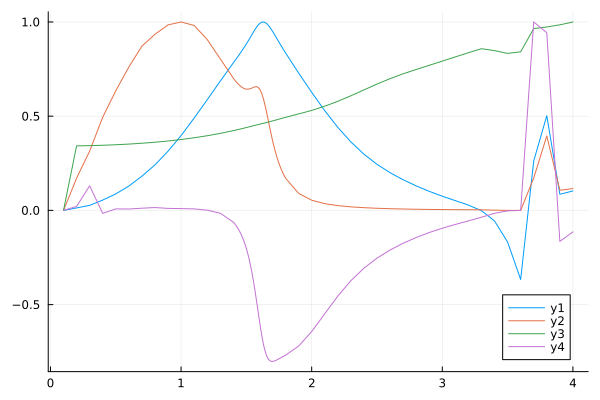

In [100]:
αₘₐₓ=α[1,argmax(α[1,:])]
B =sqrt.(B₁[1,:] .* B₁[1,:] .+ B₂[1,:] .* B₂[1,:])    
Bₘₐₓ=B[argmax(B)]
ωₘₐₓ=ω[1,argmax(ω[1,:])]
Dₘₐₓ=D[1,argmax(abs.(D[1,:]))]

plot(U,α[1,:] ./ αₘₐₓ)
plot!(U,B ./ Bₘₐₓ)
plot!(U,ω[1,:] ./ ωₘₐₓ)
plot!(U,D[1,:] ./Dₘₐₓ)

#,markershape=:circle

0.5  0.1  0.5   2.9
0.15764589432347187 -0.0007761430591905457
0.1418813048911247 -0.0006985287532714911


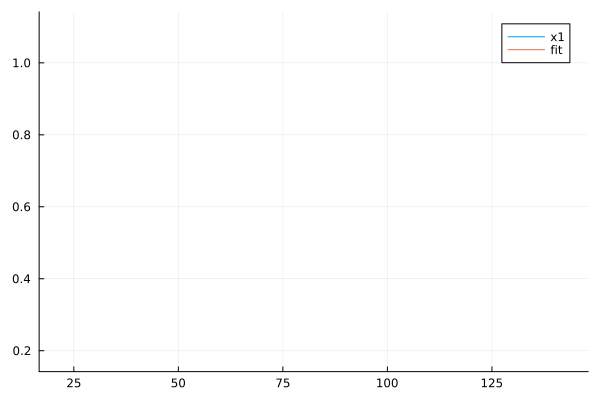

In [101]:
jj=65

jjj=ordering[jj]

Uin=F["$jjj"]["Uin"]
Vin=F["$jjj"]["Vin"]
UU=F["$jjj"]["UU"]
VV=F["$jjj"]["VV"]
t=F["$jjj"]["t"]
x1=real.(F["$jjj"]["solution_rho"][1,:] .- F["$jjj"]["solution_rho"][1,end])
x1max=x1[argmax(x1)]

println("$Vin  $Uin  $VV   $UU")

p=pp[jj,:]

m(t, p) = exp.(- t .* p[1]) .* (p[3] .* cos.(- t .* p[2]) .+ p[4] .* sin.(- t .* p[2]) .+ p[5]) 
#m(t, p) = exp.(- t .* p[1]) .* (p[3] .* cos.(- t .* p[2]) .+ p[4] .* sin.(- t .* p[2])) .+ p[5] .* exp.(- t .* p[6])


x1temp=x1[i_tstart:i_tfinal]

xmax=x1[argmax(x1temp)]
xmin=x1[argmin(x1temp)]

println(xmin," ",xmax)

if xmax>0
    xmax=1.1*xmax
else
    xmax=0.9*xmax
end

if xmin>0
    xmin=0.9*xmin
else
    xmin=1.1*xmin
end

println(xmin," ",xmax)

plot(t, x1,xrange=(t[i_tstart],t[i_tfinal]),yrange=(xmin,xmax),label="x1")  
#plot(t, x1,label="x1")  
plot!(t,m(t, p),label="fit")


#plot(t, (x1-m(t, p))./x1max,xrange=(t[100],100),yrange=(-0.005,0.005))  


#plot(t, log.(abs.(x1)),xrange=(28,100))  
#plot!(t,log.(abs.(m(t, p))),xrange=(28,100))


In [53]:
length(x1temp)

101

In [48]:
pp[jj,:]

5-element Vector{Float64}:
  0.004900287600395461
  1.5911091119701766
  0.0005091875356440374
 -0.0003578963334003817
 -0.0051021441360013

In [56]:
[0.12922294220595074, 0.9889290381057395, 0.013274343531960319, -0.026935177801676355, -0.04464193688941608]

5-element Vector{Float64}:
  0.12922294220595074
  0.9889290381057395
  0.013274343531960319
 -0.026935177801676355
 -0.04464193688941608

In [8]:
B[1,:]

1-element Vector{Float64}:
 0.0

In [9]:
A  = Array{Float64}(undef,3,length(F));
α  = Array{Float64}(undef,3,length(F));    #   α =1/tᵣₑₗ

B₁ = Array{Float64}(undef,3,length(F));
B₂ = Array{Float64}(undef,3,length(F));
ω  = Array{Float64}(undef,3,length(F));
D  = Array{Float64}(undef,3,length(F));




parameter_exp=[0.70717,0.00072]
parameter_osc=[2*pi/8.0,0.1,0.1,0]

for jj in 1:Lngth
    
    jjj=ordering[jj]
    
    Uin=F["$jjj"]["Uin"]
    Vin=F["$jjj"]["Vin"]
    Ufi=F["$jjj"]["UU"]
    #U[jj]=Ufi
    Vfi=F["$jjj"]["VV"]
      
    if (abs(Ufi-Uin) + abs(Vfi-Vin) > 0.00001)   
        
        #println("($Vin,$Uin) -> ($Vfi,$Ufi)")
        
        t=F["$jjj"]["t"]
        x1=real.(F["$jjj"]["solution_rho"][1,:] .- F["$jjj"]["solution_rho"][1,end])

        ################################################
        x1maxindex=findlocalmaxima(x1);
        xdata_max = t[x1maxindex]
        ydata_max = x1[x1maxindex]

        index=length(xdata_max)
        for j in 1:length(xdata_max)
            if abs(ydata_max[j]) < 1e-8
                index=j
                break
            end
        end
        
        i_tstart=4
        i_tfinal=index

        
        println("($Vin,$Uin) -> ($Vfi,$Ufi)             $i_tstart    $i_tfinal")
        
        xdata_exp=xdata_max[i_tstart:i_tfinal]
        ydata_exp=ydata_max[i_tstart:i_tfinal]
        
        m_exp(t, p) = p[1] .* exp.(- t .* p[2])

        p0_exp=deepcopy(parameter_exp)
        fit_exp = curve_fit(m_exp, xdata_exp, ydata_exp, p0_exp);
        parameter_exp=deepcopy(fit_exp.param)
        
        if (!fit_exp.converged) 
            println("WARNING: FIT NOT CONVERGED")  
        end
        
        ci_exp = confidence_interval(fit_exp, 0.1)
        total_err_exp = sum(map(x -> abs(x[2] - x[1]), ci_exp))
        fmt_fl(x::Float64; left=3, right=5) = lpad(round(x, digits=5), 7,' ')
        cov_exp = estimate_covar(fit_exp)
        
        sum_cov_exp=0
        for ij in 1:length(cov_exp)
            sum_cov_exp += cov_exp[ij]
        end
        

        println("Exponential decay: p1 * epx(-p2 * t)")
        println(parameter_exp)
        println(cov_exp)
        println(sum_cov_exp)
        println("")
        
        
        A[1,jj] = parameter_exp[1]
        A[2,jj] = ci_exp[1][1] - A[1,jj] 
        A[3,jj] = ci_exp[1][2] - A[1,jj]
        
        α[1,jj] = parameter_exp[2]
        α[2,jj] = ci_exp[2][1] - α[1,jj]
        α[3,jj] = ci_exp[2][2] - α[1,jj]
        
        

       

        
    end


end

(0.5,0.1) -> (0.5,0.2)             4    57
Exponential decay: p1 * epx(-p2 * t)
[0.01829075176492985, 0.0017016432763038052]
[2.334720439913505e-10 4.492547053434495e-11; 4.492547053434495e-11 1.2302436701227912e-11]
3.3562542176126835e-10

(0.5,0.1) -> (0.5,0.3)             4    57
Exponential decay: p1 * epx(-p2 * t)
[0.03713976571191979, 0.0032051030841451517]
[4.252559310474596e-8 4.847860826502254e-9; 4.847860826502254e-9 8.426627501471536e-10]
5.306397750789762e-8

(0.5,0.1) -> (0.5,0.4)             4    58
Exponential decay: p1 * epx(-p2 * t)
[0.05071939719479672, 0.007878744585845934]
[3.4127310842965453e-8 5.1224899436151386e-9; 5.1224899436151386e-9 1.1814620882803794e-9]
4.5553752818476104e-8

(0.5,0.1) -> (0.5,0.5)             4    58
Exponential decay: p1 * epx(-p2 * t)
[0.06623705602053266, 0.012316969738953383]
[1.1667147081979187e-8 1.977221982400958e-9; 1.977221982400958e-9 4.731553699539342e-10]
1.609474641673504e-8

(0.5,0.1) -> (0.5,0.5)             4    58
Exponent

[1.2407887646806607e27 4.914043113781498e19; 4.914043113781498e19 1.946166859915632e12]
1.2407888629615248e27

(0.5,0.1) -> (0.5,1.71)             4    26
Exponential decay: p1 * epx(-p2 * t)
[1.2522505394787446e6, 1.483373328214973]
[1.8558942438184436e27 7.382084353354136e19; 7.382084353354136e19 2.9363294605912656e12]
1.8558943914601335e27

(0.5,0.1) -> (0.5,1.72)             4    26
Exponential decay: p1 * epx(-p2 * t)
[1.2522505394787446e6, 1.4835864084228028]
[2.4256350191347777e27 9.690161814655754e19; 9.690161814655754e19 3.8711197408577285e12]
2.4256352129380178e27

(0.5,0.1) -> (0.5,1.73)             4    28
Exponential decay: p1 * epx(-p2 * t)
[1.2522505394787446e6, 1.4838951037981827]
[2.554441969098772e27 1.024886939285246e20; 1.024886939285246e20 4.1120262347254316e12]
2.554442174076163e27

(0.5,0.1) -> (0.5,1.74)             4    27
Exponential decay: p1 * epx(-p2 * t)
[1.2522505394787446e6, 1.48431913641203]
[6.476957441805143e27 2.6098755720111574e20; 2.609875572011157

In [10]:
A  = Array{Float64}(undef,3,length(F));
α  = Array{Float64}(undef,3,length(F));    #   α =1/tᵣₑₗ

B₁ = Array{Float64}(undef,3,length(F));
B₂ = Array{Float64}(undef,3,length(F));
ω  = Array{Float64}(undef,3,length(F));
D  = Array{Float64}(undef,3,length(F));




parameter_exp=[0.70717,0.00072]
parameter_osc=[2*pi/8.0,0.1,0.1,0]

for jj in 1:Lngth
    
    jjj=ordering[jj]
    
    Uin=F["$jjj"]["Uin"]
    Vin=F["$jjj"]["Vin"]
    Ufi=F["$jjj"]["UU"]
    #U[jj]=Ufi
    Vfi=F["$jjj"]["VV"]
      
    if (abs(Ufi-Uin) + abs(Vfi-Vin) > 0.00001)   
        
        #println("($Vin,$Uin) -> ($Vfi,$Ufi)")
        
        t=F["$jjj"]["t"]
        x1=real.(F["$jjj"]["solution_rho"][1,:] .- F["$jjj"]["solution_rho"][1,end])

        ################################################
        x1maxindex=findlocalmaxima(x1);
        xdata_max = t[x1maxindex]
        ydata_max = x1[x1maxindex]

        index=length(xdata_max)
        for j in 1:length(xdata_max)
            if abs(ydata_max[j]) < 1e-10
                index=j
                break
            end
        end
        
        i_tstart=2
        i_tfinal=index

        
        println("($Vin,$Uin) -> ($Vfi,$Ufi)             $i_tstart    $i_tfinal")
        
        xdata_exp=xdata_max[i_tstart:i_tfinal]
        ydata_exp=ydata_max[i_tstart:i_tfinal]
        
        m_exp(t, p) = p[1] .* exp.(- t .* p[2])

        p0_exp=deepcopy(parameter_exp)
        fit_exp = curve_fit(m_exp, xdata_exp, ydata_exp, p0_exp);
        parameter_exp=deepcopy(fit_exp.param)
        
        if (!fit_exp.converged) 
            println("WARNING: FIT NOT CONVERGED")  
        end
        
        ci_exp = confidence_interval(fit_exp, 0.1)
        total_err_exp = sum(map(x -> abs(x[2] - x[1]), ci_exp))
        fmt_fl(x::Float64; left=3, right=5) = lpad(round(x, digits=5), 7,' ')
        cov_exp = estimate_covar(fit_exp)
        
        sum_cov_exp=0
        for ij in 1:length(cov_exp)
            sum_cov_exp += cov_exp[ij]
        end
        

        println("Exponential decay: p1 * epx(-p2 * t)")
        println(parameter_exp)
        println(cov_exp)
        println(sum_cov_exp)
        println("")
        
        
        A[1,jj] = parameter_exp[1]
        A[2,jj] = ci_exp[1][1] - A[1,jj] 
        A[3,jj] = ci_exp[1][2] - A[1,jj]
        
        α[1,jj] = parameter_exp[2]
        α[2,jj] = ci_exp[2][1] - α[1,jj]
        α[3,jj] = ci_exp[2][2] - α[1,jj]
        
        

        ################################################
        ii_tstart=0
        ii_tfinal=0
        
        for j in 1:length(t)
            if t[j]==xdata_exp[1]
                ii_tstart=j
            elseif t[j]==xdata_exp[end]
                ii_tfinal=j
            end
        end

        xdata_osc=t[ii_tstart:ii_tfinal] 
        ydata_osc=x1[ii_tstart:ii_tfinal] .* exp.(parameter_exp[2] .* xdata_osc);


        m_osc(t, p) = p[2] .* cos.(- t .* p[1]) .+ p[3] .* sin.(- t .* p[1]) .+ p[4]


        p0_osc=deepcopy(parameter_osc)
        fit_osc = curve_fit(m_osc, xdata_osc, ydata_osc, p0_osc);
        parameter_osc=deepcopy(fit_osc.param)

        if (!fit_osc.converged) 
            println("WARNING: FIT NOT CONVERGED")  
        end

        ci_osc = confidence_interval(fit_osc, 0.1)
        total_err_osc = sum(map(x -> abs(x[2] - x[1]), ci_osc))
        #fmt_fl(x::Float64; left=3, right=5) = lpad(round(x, digits=5), 7,' ')
        cov_osc = estimate_covar(fit_osc)

        sum_cov_osc=0
        for ij in 1:length(cov_exp)
            sum_cov_osc += cov_osc[ij]
        end
        
        println("Oscilation: p2*cos(p1*t)+p3*sin(p1*t)+p4")
        println(parameter_osc)
        println(cov_osc)
        println(sum_cov_osc)
        println("")
        
        ω[1,jj] = parameter_osc[1]
        ω[2,jj] = ci_osc[1][1] - ω[1,jj] 
        ω[3,jj] = ci_osc[1][2] - ω[1,jj]
        
        B₁[1,jj] = parameter_osc[2]
        B₁[2,jj] = ci_osc[2][1] - B₁[1,jj] 
        B₁[3,jj] = ci_osc[2][2] - B₁[1,jj]
        
        B₂[1,jj] = parameter_osc[3]
        B₂[2,jj] = ci_osc[3][1] - B₂[1,jj] 
        B₂[3,jj] = ci_osc[3][2] - B₂[1,jj]
         
        D[1,jj] = parameter_osc[3]
        D[2,jj] = ci_osc[4][1] - B₂[1,jj] 
        D[3,jj] = ci_osc[4][2] - B₂[1,jj]
        
    end


end

(0.5,0.1) -> (0.5,0.2)             2    57
Exponential decay: p1 * epx(-p2 * t)
[0.01831864819378604, 0.0017069010068174477]
[2.4268282690091787e-10 4.688287925026221e-11; 4.688287925026221e-11 1.3755323905962904e-11]
3.502039093074052e-10

Oscilation: p2*cos(p1*t)+p3*sin(p1*t)+p4
[0.7784073176879426, -0.000695963405193338, -0.0004432654169015708, 0.001482378007561277]
[1.6594613656022177e-5 -2.0187523215166022e-6 3.160408417766255e-6 3.782889876940086e-9; -2.0187523215166022e-6 4.5435926097725237e-7 -3.841526114965971e-7 1.9671048397255643e-10; 3.160408417766255e-6 -3.841526114965971e-7 8.110228125875961e-7 1.2124318147184606e-9; 3.782889876940086e-9 1.9671048397255643e-10 1.2124318147184606e-9 1.04478598164782e-7]
1.774005264214877e-5

(0.5,0.1) -> (0.5,0.3)             2    57
Exponential decay: p1 * epx(-p2 * t)
[0.03747288255717896, 0.0032422591293386153]
[3.724422551061212e-8 4.27158339909239e-9; 4.27158339909239e-9 8.256904561423816e-10]
4.6613082764939277e-8

Oscilation: p2*cos

Oscilation: p2*cos(p1*t)+p3*sin(p1*t)+p4
[-109.8817410338266, -15204.670343071757, 47199.746504098315, -304039.30602323456]
[0.0012410411545872048 13776.197650136295 4453.5120427647 0.37319436901957087; 13776.197650136295 2.045551655302849e11 4.943770866098021e10 2.6811948123884704e7; 4453.5120427647 4.943770866098021e10 6.761145878466108e10 -6.6443100083131135e7; 0.37319436901957087 2.6811948123884704e7 -6.6443100083131135e7 2.581558958597694e10]
18230.08412831117

(0.5,0.1) -> (0.5,1.4)             2    129
Exponential decay: p1 * epx(-p2 * t)
[0.047814576318063656, 0.0954234783958435]
[3.5782190990762014e-8 5.9038722198805e-8; 5.9038722198805e-8 1.1954034112101122e-7]
2.733999765093832e-7

Oscilation: p2*cos(p1*t)+p3*sin(p1*t)+p4
[-109.94142072825598, -3.1877790081879715e6, -1.3366068970462333e6, -4.099437606731642e7]
[0.0028535718172908574 -923050.0180451741 2.173887948775454e6 351.37303966592634; -923050.0180451741 9.067760788805786e14 -7.04830972605299e14 2.2754192356724146e11; 2

Oscilation: p2*cos(p1*t)+p3*sin(p1*t)+p4
[-109.91638164363998, -1.0413904120533394e11, -3.107503115386437e11, -4.574800612326658e11]
[2.4796539620619477e-5 -1.8711590320225928e9 6.273641059646994e8 825396.5200331615; -1.8711590320225928e9 1.895270120472752e23 -4.7321363710424874e22 -2.7780286686775124e19; 6.273641059646994e8 -4.7321363710424874e22 6.421235675988328e22 -6.4506452777394364e19; 825396.5200331615 -2.7780286686775124e19 -6.4506452777394364e19 2.4167156943337743e22]
-1.2429695295378354e9

(0.5,0.1) -> (0.5,1.51)             2    136
Exponential decay: p1 * epx(-p2 * t)
[0.037829857499597275, 0.11616052192623683]
[1.50641548048358e-8 3.647508764578089e-8; 3.647508764578089e-8 1.0406423537974155e-7]
1.9207856547613913e-7

Oscilation: p2*cos(p1*t)+p3*sin(p1*t)+p4
[-109.91898506649314, 6.795408940242867e11, -7.061743121393987e11, -2.2840913954564746e12]
[6.4504226011808e-5 -1.1060903545916399e10 -1.061667234769391e10 3.0054150968742743e6; -1.1060903545916399e10 3.020125478759888

Oscilation: p2*cos(p1*t)+p3*sin(p1*t)+p4
[-109.84387522165648, -5.465057495694242e27, 1.4027711027216802e27, -4.287947422174353e28]
[0.0006405753418680868 2.1960220237696206e26 8.601983094955023e26 6.754488187333631e22; 2.1960220237696206e26 4.5360021200218574e56 2.9480260278284867e56 9.42877779618314e53; 8.601983094955023e26 2.9480260278284867e56 1.534173419453407e57 -1.6846404140690631e53; 6.754488187333631e22 9.42877779618314e53 -1.6846404140690631e53 1.893435096454237e56]
1.0798680567543377e27

(0.5,0.1) -> (0.5,1.62)             2    142
Exponential decay: p1 * epx(-p2 * t)
[0.05699069940900355, 0.2075399096515992]
[1.0841191537794412e-6 2.353266258359856e-6; 2.353266258359856e-6 5.374463866566158e-6]
1.1165115537065311e-5

Oscilation: p2*cos(p1*t)+p3*sin(p1*t)+p4
[-108.89181853734492, 5.063098133692295e30, -6.788592015659072e30, -9.138997253600729e31]
[0.0013445288562878867 -2.238959110050647e30 -1.6729625522237103e30 8.867798283063202e25; -2.238959110050647e30 5.523186325199085e

LoadError: Data contains `Inf` or `NaN` values and a fit cannot be performed

In [11]:
for ix in 1:Lngth
    println(U[ix],"  ",α[1,ix],"  ",α[2,ix],"  ",α[3,ix])
end




0.1  6.9222011171914e-310  6.92220111719455e-310  6.9222011171977e-310
0.2  0.0017069010068174477  -6.206946057966045e-6  6.206946057966045e-6
0.3  0.0032422591293386153  -4.808960310750867e-5  4.808960310750867e-5
0.4  0.007900518700130251  -5.027323828343984e-5  5.027323828343984e-5
0.5  0.012438082070224664  -4.6574738510125197e-5  4.6574738510125197e-5
0.5  0.012438082070224664  -4.6574738510125197e-5  4.6574738510125197e-5
0.6  0.018605347841403268  -7.708297932921757e-5  7.708297932921757e-5
0.7  0.026229068607961856  -0.00010695724685087088  0.00010695724685087088
0.8  0.03537352330510592  -0.00013995735138584708  0.00013995735138584708
0.9  0.0459874446681004  -0.00015681889521869385  0.00015681889521869385
1.0  0.05736825328841078  -0.0002585632065583293  0.0002585632065583293
1.1  0.06943250449389633  -0.00021035857604059793  0.00021035857604059793
1.2  0.08026197427758248  -0.00020119401565424355  0.00020119401565424355
1.3  0.08747484965322565  -0.0004461630863956956  0.000

In [12]:
for ix in 1:Lngth
    BB=sqrt(B₁[1,ix]*B₁[1,ix] + B₂[1,ix]*B₂[1,ix])
    println(U[ix],"  ",BB)
end



0.1  0.0
0.2  0.000825135922857095
0.3  0.0012148364197903643
0.4  0.002521220287282522
0.5  0.0012509065571459147
0.5  0.0012509067764528117
0.6  0.0014208705405948702
0.7  0.0018012223247657738
0.8  0.004422229965249651
0.9  0.005993045469794244
1.0  0.006053992315456929
1.1  0.007765819243366267
1.2  4469.890815244845
1.3  49588.285615582914
1.4  3.456653439712383e6
1.41  8.589334762044374e6
1.42  1.6528503606781948e7
1.43  4.165307726455827e7
1.44  1.0249980939771429e8
1.45  2.829175019128396e8
1.46  9.196681288161587e8
1.47  2.5683216084787498e9
1.48  1.5556195824541002e10
1.49  3.036827344439248e11
1.5  3.277357106336298e11
1.51  9.800295841334994e11
1.52  8.70626919538158e12
1.53  2.2998154525277775e14
1.54  1.0045855552580431e15
1.55  1.0242937048088644e16
1.56  5.48849367764594e17
1.57  1.589248806298904e19
1.58  3.389056195453531e20
1.59  2.5738686820220846e22
1.6  5.255453557017941e24
1.61  5.642217666651547e27
1.62  8.46876285336108e30
1.63  5.486197883778878e34
1.64  1.347

In [13]:
jj=40

Uin=F["$jj"]["Uin"]
Vin=F["$jj"]["Vin"]
UU=F["$jj"]["UU"]
VV=F["$jj"]["VV"]
t=F["$jj"]["t"]
x1=real.(F["$jj"]["solution_rho"][1,:] .- F["$jj"]["solution_rho"][1,end])


println("$Vin  $Uin  $VV   $UU")

################################################

x1maxindex=findlocalmaxima(x1);
xdata_max = t[x1maxindex]
ydata_max = x1[x1maxindex]


index=length(xdata_max)
for j in 1:length(xdata_max)
    if ydata_max[j] < 1e-8
        index=j
        #println(index,"  ",ydata_max[j])
        break
    end
end

i_tstart=25
i_tfinal=index

println(index)

xdata_exp=xdata_max[i_tstart:i_tfinal]
ydata_exp=ydata_max[i_tstart:i_tfinal]

parameter_exp=[0.70717,0.00072]
m_exp(t, p) = p[1] .* exp.(- t .* p[2])
#m(t, p) = p[1] .* t.^(-p[2])

p0_exp=deepcopy(parameter_exp)

fit_exp = curve_fit(m_exp, xdata_exp, ydata_exp, p0_exp);

parameter_exp=deepcopy(fit_exp.param)

if (!fit_exp.converged) 
    println("WARNING: FIT NOT CONVERGED")  
end


ci_exp = confidence_interval(fit_exp, 0.1)
total_err_exp = sum(map(x -> abs(x[2] - x[1]), ci_exp))


fmt_fl(x::Float64; left=3, right=5) = lpad(round(x, digits=5), 7,' ')

cov_exp = estimate_covar(fit_exp)

println("")
println("Exponential decay: p1 * epx(-p2 * t)")

println(parameter_exp)

println(cov_exp)

################################################

ii_tstart=0
ii_tfinal=0

for j in 1:length(t)
    if t[j]==xdata_exp[1]
        ii_tstart=j
    elseif t[j]==xdata_exp[end]
        ii_tfinal=j
    end
end

#println(ii_tstart,"  ",ii_tfinal)

xdata_osc=t[ii_tstart:ii_tfinal] 
ydata_osc=x1[ii_tstart:ii_tfinal] .* exp.(parameter_exp[2] .* xdata_osc);


#parameter_osc=[2*pi/8.0,0.1,0.1,0]
m_osc(t, p) = p[2] .* cos.(- t .* p[1]) .+ p[3] .* sin.(- t .* p[1]) .+ p[4]


p0_osc=deepcopy(parameter_osc)

fit_osc = curve_fit(m_osc, xdata_osc, ydata_osc, p0_osc);

parameter_osc=deepcopy(fit_osc.param)

if (!fit_osc.converged) 
    println("WARNING: FIT NOT CONVERGED")  
end


ci_osc = confidence_interval(fit_osc, 0.1)
total_err_osc = sum(map(x -> abs(x[2] - x[1]), ci_osc))


fmt_fl(x::Float64; left=3, right=5) = lpad(round(x, digits=5), 7,' ')

cov_osc = estimate_covar(fit_osc)

println("")
println("Oscilation: p2*cos(p1*t)+p3*sin(p1*t)+p4")

println(parameter_osc)

println(cov_osc)



0.5  0.1  0.5   1.67
6
 ** On entry to DGEQRT parameter number  3 had an illegal value


LoadError: ArgumentError: invalid argument #3 to LAPACK call

In [14]:
sum_cov_exp=0
for ij in 1:length(cov_exp)
    sum_cov_exp += cov_exp[ij]
end
sum_cov_exp

LoadError: UndefVarError: `cov_exp` not defined

0.5  0.1  0.5   1.72


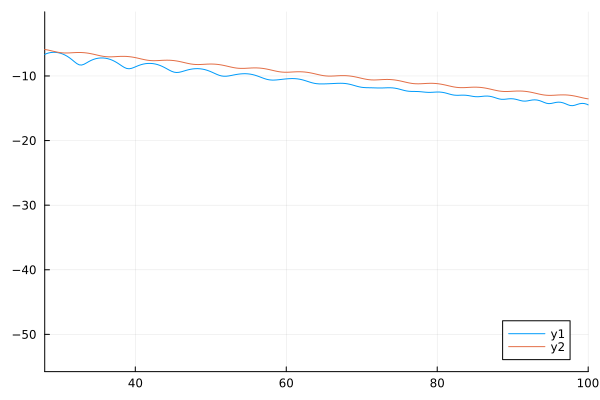

In [7]:
jj=45


Uin=F["$jj"]["Uin"]
Vin=F["$jj"]["Vin"]
UU=F["$jj"]["UU"]
VV=F["$jj"]["VV"]
t=F["$jj"]["t"]
x1=real.(F["$jj"]["solution_rho"][1,:] .- F["$jj"]["solution_rho"][1,end])


println("$Vin  $Uin  $VV   $UU")



plot(t, log.(abs.(x1)),xlimits=(0,100),xrange=(28,100))
    


p=[0.10232577449065086, 1.0781092199832532, 0.0020538516755560206, -0.006473229399730181, -0.04305795434444895]

m(t, p) = exp.(- t .* p[1]) .* (p[3] .* cos.(- t .* p[2]) .+ p[4] .* sin.(- t .* p[2]) .+ p[5])

plot!(t,log.(abs.(m(t, p))),xrange=(28,100))


In [16]:
t[100]

28.065311023679

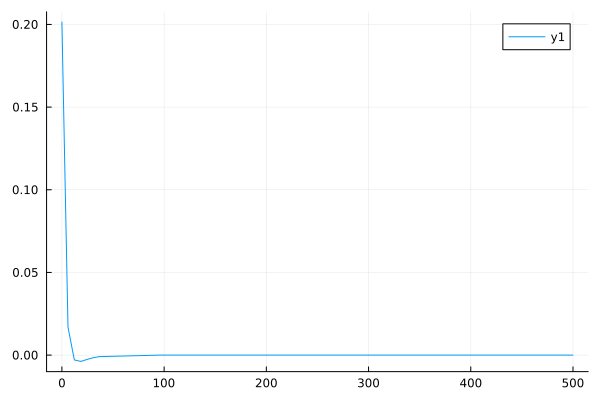

In [17]:
x1maxindex=findlocalmaxima(x1);
xdata_max = t[x1maxindex]
ydata_max = x1[x1maxindex]
plot(xdata_max,ydata_max)

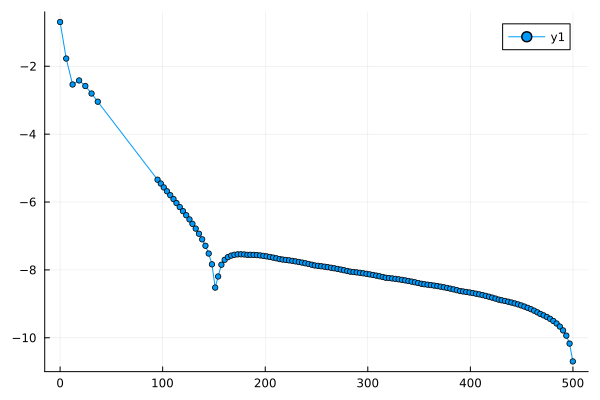

In [18]:
plot(xdata_max,log.(abs.(ydata_max))./ log(10), markershape=:circle, markersize=3)

In [19]:
index=length(xdata_max)
for j in 1:length(xdata_max)
    if ydata_max[j] < 1e-8
        index=j
        println(index,"  ",ydata_max[j])
        break
    end
end

println(index,"  ",ydata_max[index])
        


3  -0.002900719821567428
3  -0.002900719821567428


In [20]:
i_tstart=5
i_tfinal=index

xdata_exp=xdata_max[i_tstart:i_tfinal]
ydata_exp=ydata_max[i_tstart:i_tfinal]

parameter_exp=[0.70717,0.00072]
m_exp(t, p) = p[1] .* exp.(- t .* p[2])
#m(t, p) = p[1] .* t.^(-p[2])

p0_exp=deepcopy(parameter_exp)

fit_exp = curve_fit(m_exp, xdata_exp, ydata_exp, p0_exp);

parameter_exp=deepcopy(fit_exp.param)

if (!fit_exp.converged) 
    println("WARNING: FIT NOT CONVERGED")  
end


ci_exp = confidence_interval(fit_exp, 0.1)
total_err_exp = sum(map(x -> abs(x[2] - x[1]), ci_exp))


fmt_fl(x::Float64; left=3, right=5) = lpad(round(x, digits=5), 7,' ')

cov_exp = estimate_covar(fit_exp)

println(parameter_exp)

println(cov_exp)


 ** On entry to DGEQRT parameter number  3 had an illegal value


LoadError: ArgumentError: invalid argument #3 to LAPACK call

In [21]:
ii_tstart=0
ii_tfinal=0

for j in 1:length(t)
    if t[j]==xdata_exp[1]
        ii_tstart=j
    elseif t[j]==xdata_exp[end]
        ii_tfinal=j
    end
end

#println(ii_tstart,"  ",ii_tfinal)

xdata_osc=t[ii_tstart:ii_tfinal] 
ydata_osc=x1[ii_tstart:ii_tfinal] .* exp.(parameter_exp[2] .* xdata_osc);


parameter_osc=[2*pi/8.0,0.1,0.1,0]
m_osc(t, p) = p[2] .* cos.(- t .* p[1]) .+ p[3] .* sin.(- t .* p[1]) .+ p[4]


p0_osc=deepcopy(parameter_osc)

fit_osc = curve_fit(m_osc, xdata_osc, ydata_osc, p0_osc);

parameter_osc=deepcopy(fit_osc.param)

if (!fit_osc.converged) 
    println("WARNING: FIT NOT CONVERGED")  
end


ci_osc = confidence_interval(fit_osc, 0.1)
total_err_osc = sum(map(x -> abs(x[2] - x[1]), ci_osc))


fmt_fl(x::Float64; left=3, right=5) = lpad(round(x, digits=5), 7,' ')

cov_osc = estimate_covar(fit_osc)

println(parameter_osc)

println(cov_osc)


LoadError: BoundsError: attempt to access 0-element Vector{Float64} at index [1]

In [22]:
plot(xdata_osc,  ydata_osc,xlimits=(xdata_exp[1],xdata_exp[end]),ylimits=(-0.15,0.15))

plot!(xdata_osc,parameter_osc[2] .* cos.(- xdata_osc .* parameter_osc[1]) .+ parameter_osc[3] .* sin.(- xdata_osc .* parameter_osc[1]) .+parameter_osc[4])

LoadError: BoundsError: attempt to access 0-element Vector{Float64} at index [1]